In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use('default')
#import missingno as msno
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
x_in = pd.read_csv('./X_In.csv')
y_out = pd.read_csv('./Y_Out.csv')

In [3]:
x_in

,G,F,E,D,C,B,A
0,4.231242,0.780309,4.730696,2.156199,0.645430,3.787909,2.969870
1,0.636853,2.024109,2.090387,2.159703,3.502169,2.557124,3.135354
2,2.986594,0.456140,0.779718,3.521068,2.736177,3.317250,2.819513
3,0.038345,4.963844,3.928005,2.248092,3.118439,2.997237,4.477473
4,0.161174,0.377934,0.603821,0.664421,3.294831,4.219109,0.200306
...,...,...,...,...,...,...,...
2995,2.056724,4.477795,3.979243,2.806371,2.103063,0.736982,2.135951
2996,0.618115,0.450802,0.306972,0.445826,4.610452,3.433284,3.341625
2997,0.767298,3.699980,2.148935,3.474454,3.529111,4.851634,3.360225
2998,4.788652,4.666987,0.380597,0.648245,3.777372,3.012495,0.210921


In [4]:
x_in.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G,3000.0,2.590285,1.604734,0.010077,0.665077,2.903298,3.974684,4.998365
F,3000.0,1.965161,1.690472,0.010112,0.405278,1.399470,3.562746,4.997755
E,3000.0,1.649671,1.631066,0.011430,0.341464,0.661101,3.171319,4.996231
D,3000.0,2.561969,1.599814,0.011554,0.649327,2.826391,3.917133,4.998732
C,3000.0,3.209406,1.243147,0.011094,2.522144,3.380168,4.194329,4.999503
B,3000.0,2.885497,1.475650,0.014197,2.195208,3.129513,4.080856,4.999700
A,3000.0,2.881446,1.460738,0.011204,2.206358,3.122611,4.047043,4.998118


In [5]:
y_out

,D8,D4,D2,D1
0,0,0,1,0
1,0,0,0,0
2,1,0,0,1
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
2995,0,1,1,0
2996,0,1,1,1
2997,0,0,0,0
2998,0,1,0,0


In [6]:
y_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
D8,3000.0,0.2,0.400067,0.0,0.0,0.0,0.0,1.0
D4,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D2,3000.0,0.4,0.489980,0.0,0.0,0.0,1.0,1.0
D1,3000.0,0.5,0.500083,0.0,0.0,0.5,1.0,1.0


In [7]:
train_x, test_x, train_y, test_y = train_test_split(x_in, y_out, test_size=0.2, random_state=42)

In [8]:
test_x

,G,F,E,D,C,B,A
1801,0.174530,0.188228,0.523334,0.675096,2.484163,2.995934,0.338367
1190,4.207722,0.013703,4.040707,3.004205,0.784202,3.285380,2.722715
1817,2.818136,2.918551,0.306105,0.620222,4.810886,2.800230,0.342616
251,0.399060,0.087293,0.761647,0.755875,4.499389,2.621071,0.554171
2505,0.700935,3.077477,4.305871,3.042248,4.503716,2.352260,3.577462
...,...,...,...,...,...,...,...
104,4.906622,2.294382,3.849350,2.307665,3.022635,3.835095,4.374623
2087,2.155518,4.950391,0.225561,0.315463,4.045515,3.078376,0.707056
599,2.881734,0.445104,2.610229,4.843235,0.723166,4.397560,2.154321
1756,2.900993,4.773931,2.375691,2.627030,3.522794,2.581243,2.118862


# Machine Learning

In [9]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(7,)),
  keras.layers.Dense(20, activation = 'tanh'),                        
  keras.layers.Dense(4, activation = 'sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 4)                 84        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True) , metrics=['binary_accuracy'])

In [11]:
history = model.fit(train_x, train_y, epochs=50, batch_size = 32, validation_data=(test_x, test_y))

Epoch 1/50


c:\Users\efrai\Documents\Academico\PDS\venv\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 1s 7ms/step - loss: 0.6979 - binary_accuracy: 0.5930 - val_loss: 0.5829 - val_binary_accuracy: 0.7167
Epoch 2/50
 1/75 [..............................] - ETA: 0s - loss: 0.6224 - binary_accuracy: 0.7109

c:\Users\efrai\Documents\Academico\PDS\venv\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 [==============================] - 0s 4ms/step - loss: 0.5321 - binary_accuracy: 0.7627 - val_loss: 0.4909 - val_binary_accuracy: 0.8087
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.4678 - binary_accuracy: 0.8139 - val_loss: 0.4413 - val_binary_accuracy: 0.8279
Epoch 4/50
75/75 [==============================] - 0s 3ms/step - loss: 0.4261 - binary_accuracy: 0.8335 - val_loss: 0.4045 - val_binary_accuracy: 0.8408
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: 0.3929 - binary_accuracy: 0.8473 - val_loss: 0.3738 - val_binary_accuracy: 0.8592
Epoch 6/50
75/75 [==============================] - 0s 3ms/step - loss: 0.3660 - binary_accuracy: 0.8580 - val_loss: 0.3498 - val_binary_accuracy: 0.8700
Epoch 7/50
75/75 [==============================] - 0s 3ms/step - loss: 0.3438 - binary_accuracy: 0.8661 - val_loss: 0.3285 - val_binary_accuracy: 0.8771
Epoch 8/50
75/75 [==============================] - 0s 3ms/step - loss: 0.3250 - binary

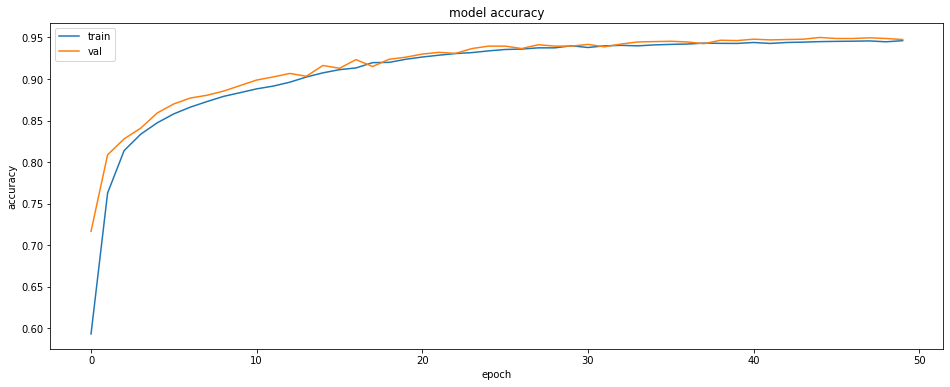

In [12]:
plt.figure(figsize=(16,6))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
for layer in model.layers:
    print(layer.trainable_weights)

[<tf.Variable 'dense/kernel:0' shape=(7, 20) dtype=float32, numpy=
array([[-0.9155784 ,  0.08916633, -0.01570122, -0.17675623, -0.20077439,
        -0.63166344, -0.7069625 ,  0.5659454 ,  0.1870908 , -0.4089915 ,
        -0.47376335, -0.11519542,  0.31506836,  0.5708358 , -0.25247437,
        -0.13065922, -0.705911  ,  0.33564827, -0.59202516,  0.33001295],
       [-0.4024823 ,  1.1442182 , -0.35048363, -0.7935797 ,  0.32517108,
        -0.6560849 ,  0.06935858, -0.80394036,  0.7104107 ,  0.18085575,
        -0.25299615, -0.561594  ,  0.82581925,  0.600719  ,  0.22935106,
         0.45453313,  0.33675495, -0.6649453 , -0.18407264,  0.44786665],
       [ 0.0393731 ,  0.5392706 , -0.8797351 , -0.09468561, -0.79512817,
        -0.7156861 ,  0.17481077,  0.8716404 ,  0.43395236, -0.10202029,
        -0.18237337, -0.1485812 ,  1.210075  , -0.17108142, -0.8200123 ,
         1.5921414 , -0.07471155, -0.45110306,  0.72860414, -0.2427851 ],
       [-0.22128063, -0.22029606, -0.01074035,  0.3682

In [14]:
pred_y = model.predict(test_x)

19/19 [==============================] - 0s 2ms/step


In [15]:
for i in range(len(pred_y)):
  for j in range(4):
    pred_y[i][j] = 1 if pred_y[i][j] >= 0.5 else 0
    

In [16]:
pred_y

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [17]:
def bin_to_decimal(bit1 , bit2 ,bit3 , bit4):
  return 8*bit1 + 4 * bit2 + 2 * bit3 + 1*bit4


In [18]:
train_x

,G,F,E,D,C,B,A
642,2.444103,0.460603,0.749318,4.736375,2.418632,3.263225,2.711722
700,0.158693,0.621028,0.712280,0.533141,3.896723,2.495441,0.053478
226,0.738093,0.737349,0.373939,0.796928,2.491172,2.555742,4.440272
1697,2.566108,0.358024,2.799909,2.948920,0.688127,4.289551,2.227728
1010,2.515494,2.649312,3.032679,3.609436,3.030772,0.581771,4.052655
...,...,...,...,...,...,...,...
1638,0.671393,2.724210,2.705829,2.010862,3.662633,4.745228,4.457242
1095,4.076730,4.594132,2.698480,3.028804,3.797573,0.784634,2.462406
1130,3.406268,4.214807,4.618412,3.099706,3.094677,0.590967,4.214093
1294,0.785481,3.426858,3.797205,3.317460,2.401102,2.773074,2.698891


In [19]:
resps = []

for num in pred_y :
  resps.append(bin_to_decimal(num[0],num[1],num[2],num[3]))

resps

[1.0,
 2.0,
 4.0,
 1.0,
 0.0,
 2.0,
 6.0,
 1.0,
 0.0,
 6.0,
 7.0,
 9.0,
 4.0,
 11.0,
 7.0,
 7.0,
 11.0,
 9.0,
 7.0,
 2.0,
 5.0,
 3.0,
 11.0,
 1.0,
 1.0,
 8.0,
 1.0,
 0.0,
 1.0,
 1.0,
 6.0,
 4.0,
 2.0,
 5.0,
 4.0,
 8.0,
 2.0,
 11.0,
 11.0,
 2.0,
 7.0,
 11.0,
 1.0,
 4.0,
 5.0,
 0.0,
 5.0,
 6.0,
 1.0,
 1.0,
 4.0,
 11.0,
 4.0,
 3.0,
 11.0,
 8.0,
 7.0,
 8.0,
 1.0,
 1.0,
 2.0,
 9.0,
 2.0,
 9.0,
 5.0,
 8.0,
 1.0,
 11.0,
 2.0,
 4.0,
 7.0,
 6.0,
 1.0,
 5.0,
 4.0,
 2.0,
 6.0,
 8.0,
 6.0,
 6.0,
 0.0,
 2.0,
 3.0,
 4.0,
 8.0,
 0.0,
 7.0,
 2.0,
 8.0,
 6.0,
 0.0,
 3.0,
 8.0,
 6.0,
 5.0,
 7.0,
 1.0,
 5.0,
 7.0,
 0.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 0.0,
 1.0,
 4.0,
 6.0,
 7.0,
 2.0,
 7.0,
 4.0,
 1.0,
 3.0,
 5.0,
 2.0,
 9.0,
 2.0,
 3.0,
 5.0,
 5.0,
 4.0,
 8.0,
 7.0,
 5.0,
 5.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 5.0,
 6.0,
 8.0,
 1.0,
 1.0,
 7.0,
 6.0,
 4.0,
 6.0,
 3.0,
 0.0,
 5.0,
 0.0,
 1.0,
 8.0,
 8.0,
 6.0,
 0.0,
 8.0,
 0.0,
 8.0,
 2.0,
 7.0,
 7.0,
 6.0,
 7.0,
 5.0,
 4.0,
 6.0,
 11.0,
 1.0,
 0.0,
 9.0,


In [20]:
new_tests = [[2.50198930213149,0.439350927051998,2.48548207218913,4.46270844985632,0.437979299603599,2.97579370472236,2.42779734998041],
    [0.224953481291687,0.0591578948752182,0.602966424751168,0.273830529503537,3.02499171823299,2.70892869288254,3.53893831450574],
    [3.34128041389553,0.602692721115502,0.400020475964477,3.82931560737046,3.5671074849897,3.12630353213998,4.73393711196318],
    [2.17655192482015,2.16399848513121,2.60762397175183,2.49228652561193,3.00951002038675,2.10301006956172,4.51720992431126],
    [0.559720280523962,0.36634434746801,0.724544629977762,0.641010440082402,2.31952070757989,2.23330185414082,3.00043385888996],
    [4.27315781515812,4.53206991247133,0.0315961818645098,0.597319924344235,4.1599374900641,3.3087954121267,0.571502003659656],
    [0.772498513516504,4.64595940234057,2.61938414458311,3.75385664047026,2.83013067531399,4.90494814651418,4.6628364149798],
    [0.525645141056299,0.0865338019091946,0.296863857788462,0.303153270370191,3.99470667997045,2.21548681597094,4.49797197525578],
    [4.13369298478893,0.168581931318442,4.62149171535962,2.33383514455161,0.711017560143584,2.519789691746,4.68489968094694],
    [4.45758528479096,0.435873623714479,0.510769428565862,4.62180875413646,3.54083387504983,2.4914252650134,3.28326694687096],
    [0.111697967631273,0.18664601652709,0.457987755263476,0.155734881737423,2.68095654299123,4.42663727065873,0.674601673214305],
    [2.31824541440919,2.15815817197502,3.18040876552552,4.57606458247427,4.31062251778083,4.06848355882073,4.08636788069978],
    [3.14309995813978,2.08915376025929,0.105853631699198,2.96214359549629,2.00649684516174,0.633501822970257,2.14723265908287],
    [3.63737146903211,0.66990344768261,3.51424682224282,2.88455508374377,0.764528037627004,4.9859744200611,4.09216941499024],
    [4.57552818944141,3.59411144932426,2.11621741716333,2.46186997441944,2.99463198936035,0.732412402698918,3.7944437160024],
    [0.619822445397708,3.65536186947519,2.6423169631029,4.29201571651065,3.30768813412371,4.39854630031618,3.67164091499147],
    [0.445872996791149,0.797314425683529,0.372553984435192,0.20824261678695,3.76249460551332,4.83838573472458,3.60834184721916],
    [4.78498132650623,3.76924764436192,0.0749942498949683,0.0826228804037309,4.31682937596116,2.27120655617457,0.18689067065253],
    [0.158693338328967,0.621028093680959,0.712279702805498,0.533141114558088,3.8967233446694,2.49544114357526,0.0534782171488906],
    [0.146862974491457,2.93679211360063,2.47835776385553,2.21417662521272,3.17103345797033,4.46866132131242,4.50674030669954]
    ]

In [21]:
new_pred_y = model.predict(new_tests)

1/1 [==============================] - 0s 124ms/step


In [22]:
new_pred_y

array([[3.1974342e-02, 2.2589227e-03, 9.7814834e-01, 6.8716290e-03],
       [3.3402166e-03, 9.6971500e-01, 9.8819041e-01, 9.9869096e-01],
       [5.5455947e-01, 7.7848295e-03, 5.6066829e-01, 9.9946982e-01],
       [3.3723614e-01, 1.5470321e-01, 3.7419665e-01, 2.3014503e-02],
       [6.9900299e-03, 8.8809413e-01, 9.6878493e-01, 9.9521720e-01],
       [2.3382474e-02, 9.9166971e-01, 1.9714788e-03, 1.3102495e-02],
       [1.1293443e-01, 1.7455842e-02, 1.4144145e-03, 1.3895769e-03],
       [7.5299204e-03, 9.7877187e-01, 9.7729647e-01, 9.9931180e-01],
       [4.9312305e-02, 1.1578311e-02, 9.9069643e-01, 6.0554477e-04],
       [5.3593129e-01, 6.1727064e-03, 5.0511038e-01, 9.9919635e-01],
       [1.8730307e-02, 3.2025978e-02, 1.1154789e-01, 9.7037309e-01],
       [5.4782748e-01, 4.8803128e-03, 1.3658646e-01, 6.7077316e-03],
       [5.6589197e-02, 9.6980393e-01, 3.6385994e-02, 9.6738219e-01],
       [7.3444754e-02, 1.5271383e-03, 8.4093112e-01, 1.8289166e-02],
       [8.7603010e-02, 9.9684662e-

In [23]:
for i in range(len(new_pred_y)):
  for j in range(4):
    new_pred_y[i][j] = 1 if new_pred_y[i][j] >= 0.5 else 0

In [24]:
new_pred_y

array([[0., 0., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]], dtype=float32)

In [25]:
resps = []

for num in new_pred_y :
  resps.append(bin_to_decimal(num[0],num[1],num[2],num[3]))

resps

[2.0,
 7.0,
 11.0,
 0.0,
 7.0,
 4.0,
 0.0,
 7.0,
 2.0,
 11.0,
 1.0,
 8.0,
 5.0,
 2.0,
 6.0,
 0.0,
 7.0,
 4.0,
 1.0,
 0.0]